# Executive Summary Climate vs. Latitude Analysis by Jamie Miller
----

### Executive Summary of City Weather Factors vs. Its Proximity to the Equator
* Temperature (F) vs. Latitude: As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the northern hemisphere tends to be warmer this time of year (June) than the southern hemisphere. One explaination notes: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere (except in the Antarctic which is colder than the Arctic). This is because the Southern Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

* Humidity (%) vs. Latitude: There is no strong relationship between latitude and humidity.

* Cloudiness (%) vs. Latitude: There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 20, 40, ~75 and 100% cloudiness.  These five breaks are similar to the cloud cover classification used in the aviaiton industry which categorizes cloud cover in terms of 1/8th of sky cover with sky clear (0-8ths), trace (1-2/8th), scattered (3-4/8ths), broken (5-7/8th) and overcast ( 8/8th).

* Wind Speed (mph) vs. Latitude: There is no strong relationship between latitude and wind speed.

#### Analysis Objectives
Create a series of scatter plots to analyze the following relationships for a random selection of 500+ cities  
* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

#### Analysis Direction and Guidance
* Create a unique list of approximately 600 (non-repeat) cities (based on latitude and longitude) using numpy random to generate a list of random latitude and longitudes coordinates.  Translate those coordinates into a list of cities using citipy.  Request the weather for each of the cities from openweathermap.org using a series of successive API calls.
* Print a log of the requests made to openweathermap.org that includes each city with the city number (sequence in the list of calls) and city name.
* Create a CSV of all data retrieved and png images for each scatter plot created is included in the output_data folder.

# Generate Cities List

In [5]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
%matplotlib notebook

from IPython.display import HTML

# Date of this analysis
from datetime import datetime
Date_of_Analysis = datetime.now().strftime('%Y-%m-%d') # datetime.now returns the current date and strftime puts that date in the format year, month, date

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count and print the first ten during testing
len(cities)


628

## Perform API Calls
Make a openweather.org request for each city by making successive API calls.
Print a log of each city as it's being processed with the city number and city name.

In [3]:
# Create query URl and an empty DataFrame for city_data
# Save openweathermap.org config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

city_data_df = pd.DataFrame({"City": [],
                            "Cloudiness": [],
                            "Country": [],
                            "Humidity": [],
                            "Lat": [],
                            "Lng": [],
                            "Max_temp": [],
                            "Wind_speed": []
                            })
                           

In [4]:
#Print message to logger
print("Start of Data Retrieval")
print("=============================")

# API request for each city and adding city data to city_data_df
#Initalize value of i
i = 0
for city in cities:
    response_request = requests.get(query_url+city)
    response = response_request.json()
    
    if(response['cod'] == 200): # response code 200 indicates that the request has succeeded
        i += 1
        print(f"Processing Record {i} - {city}")
        
        city_data_df.loc[i,"City"] = city
        city_data_df.loc[i,"Cloudiness"] = response["clouds"]["all"]
        city_data_df.loc[i,"Country"] = response["sys"]["country"]
        city_data_df.loc[i,"Humidity"] = response["main"]["humidity"]
        city_data_df.loc[i,"Lat"] = response["coord"]["lat"]
        city_data_df.loc[i,"Lng"] = response["coord"]["lon"]
        city_data_df.loc[i,"Max_temp"] = response["main"]["temp_max"]
        city_data_df.loc[i,"Wind_speed"] = response["wind"]["speed"] 
       
    else:
        print("City not found. Skipping to next city") # general statement for logger any respone code other than 200

#Print message to logger
print("End of Data Retrieval")
print("=============================")

Start of Data Retrieval
Processing Record 1 - atambua
Processing Record 2 - avarua
Processing Record 3 - punta arenas
Processing Record 4 - severo-kurilsk
Processing Record 5 - port alfred
Processing Record 6 - dosso
Processing Record 7 - mount gambier
Processing Record 8 - qaanaaq
Processing Record 9 - albany
Processing Record 10 - tuatapere
Processing Record 11 - ushuaia
Processing Record 12 - atuona
Processing Record 13 - gizo
Processing Record 14 - bredasdorp
Processing Record 15 - hobart
Processing Record 16 - moron
Processing Record 17 - brewster
Processing Record 18 - lebu
City not found. Skipping to next city
Processing Record 19 - cherskiy
Processing Record 20 - shimoda
Processing Record 21 - tuktoyaktuk
Processing Record 22 - deputatskiy
Processing Record 23 - emerald
Processing Record 24 - hermanus
Processing Record 25 - hasaki
Processing Record 26 - makokou
Processing Record 27 - ustyuzhna
Processing Record 28 - bluff
Processing Record 29 - port-gentil
Processing Record 30 

Processing Record 225 - padang
City not found. Skipping to next city
Processing Record 226 - itaituba
Processing Record 227 - quatre cocos
Processing Record 228 - idil
Processing Record 229 - fort abbas
Processing Record 230 - clarksburg
Processing Record 231 - waitati
Processing Record 232 - norman wells
Processing Record 233 - mar del plata
Processing Record 234 - urubicha
Processing Record 235 - mabaruma
Processing Record 236 - finschhafen
Processing Record 237 - amapa
City not found. Skipping to next city
Processing Record 238 - dingle
Processing Record 239 - ushumun
Processing Record 240 - mayo
Processing Record 241 - phanom sarakham
Processing Record 242 - uruzgan
Processing Record 243 - kulhudhuffushi
Processing Record 244 - hay river
Processing Record 245 - lahat
Processing Record 246 - rapid city
Processing Record 247 - ballina
City not found. Skipping to next city
Processing Record 248 - abha
Processing Record 249 - isla mujeres
Processing Record 250 - changde
Processing Reco

Processing Record 441 - along
Processing Record 442 - lumeje
Processing Record 443 - tiznit
Processing Record 444 - boyabat
City not found. Skipping to next city
Processing Record 445 - san
Processing Record 446 - beringovskiy
Processing Record 447 - pochutla
Processing Record 448 - faanui
Processing Record 449 - sarahan
Processing Record 450 - leshukonskoye
Processing Record 451 - san matias
Processing Record 452 - zaozhuang
Processing Record 453 - coruripe
Processing Record 454 - verkhnevilyuysk
City not found. Skipping to next city
Processing Record 455 - payakumbuh
Processing Record 456 - laguna
Processing Record 457 - sao joao da barra
Processing Record 458 - comodoro rivadavia
Processing Record 459 - terre haute
Processing Record 460 - abu dhabi
Processing Record 461 - deer lake
Processing Record 462 - sitrah
Processing Record 463 - port hedland
Processing Record 464 - poronaysk
Processing Record 465 - lomas de sargentillo
City not found. Skipping to next city
Processing Record 4

## Convert Raw Data to DataFrame
Confirm the list exceeds 500 cities and export the city data into a .csv and display the DataFrame

In [6]:
# Export the city_data_df to .csv file named city_weather_data.csv in a folder called output_data (of the current working directory)
city_data_df.to_csv("output_data/city_weather_data.csv")
city_data_df

,City,Cloudiness,Country,Humidity,Lat,Lng,Max_temp,Wind_speed
1,atambua,1.0,ID,75.0,-9.11,124.89,75.39,17.85
2,avarua,0.0,CK,77.0,-21.21,-159.78,68.00,2.24
3,punta arenas,75.0,CL,100.0,-53.16,-70.91,39.20,6.93
4,severo-kurilsk,59.0,RU,93.0,50.68,156.12,43.71,10.45
5,port alfred,8.0,ZA,90.0,-33.59,26.89,62.01,5.01
6,dosso,15.0,NE,29.0,13.05,3.19,97.53,2.35
7,mount gambier,75.0,AU,87.0,-37.83,140.78,50.00,17.22
8,qaanaaq,51.0,GL,60.0,77.48,-69.36,46.23,12.71
9,albany,20.0,US,45.0,42.65,-73.75,87.01,14.99
10,tuatapere,91.0,NZ,67.0,-46.13,167.69,46.95,22.01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder.

### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


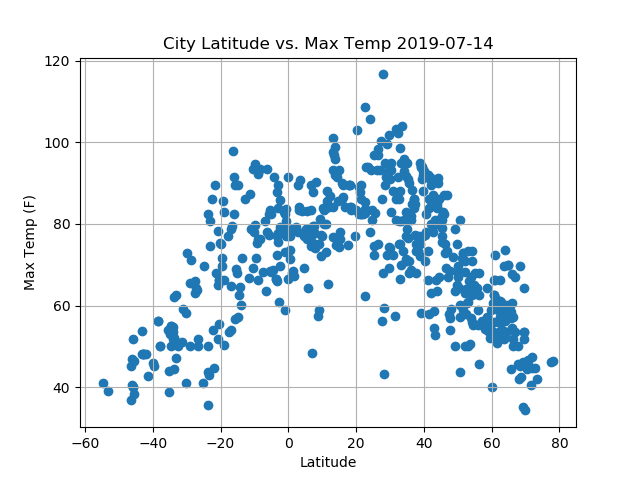

In [7]:
plt.figure()
plt.scatter(city_data_df["Lat"], city_data_df["Max_temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"City Latitude vs. Max Temp {Date_of_Analysis}")
plt.grid()

plt.savefig("output_data/Lat_vs_MaxTemp.png")

##### Analysis Latitude vs Max Temperature: 
As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the northern hemisphere tends to be warmer this time of year (June) than the southern hemisphere. One explaination notes: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere (except in the Antarctic which is colder than the Arctic). This is because the Southern Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


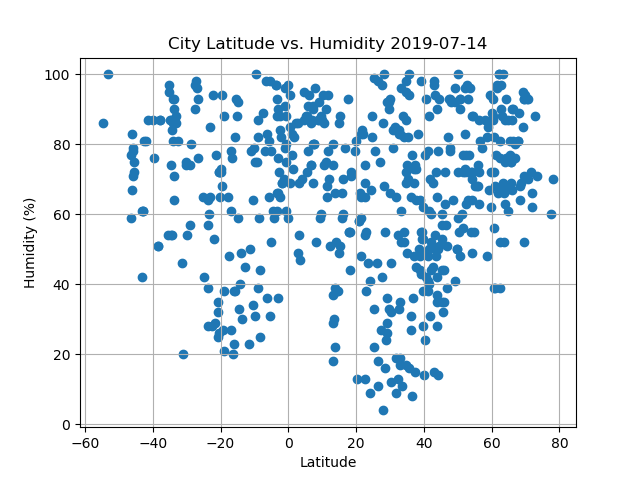

In [8]:
plt.figure()
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {Date_of_Analysis}")
plt.grid()

plt.savefig("output_data/Lat_vs_Humidity.png")

##### Analysis Latitude vs Humidity:
There is no strong relationship between latitude and humidity.


### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


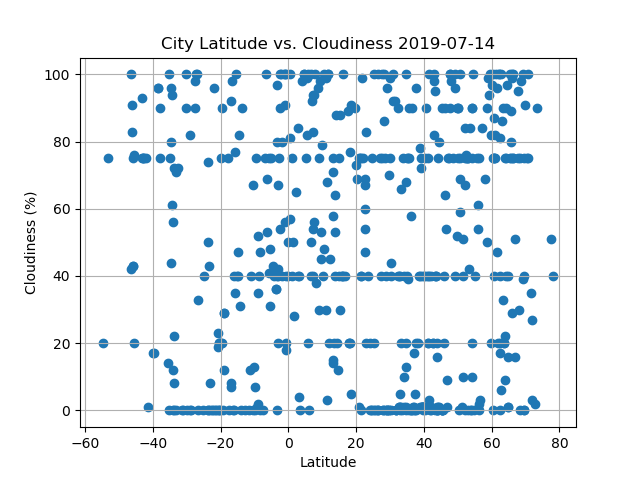

In [9]:
plt.figure()
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {Date_of_Analysis}")
plt.grid()

plt.savefig("output_data/Lat_vs_Cloudiness.png")

##### Latitude vs Cloudiness Analysis: 
There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 20, 40, ~75 and 100% cloudiness.  These five breaks are similar to the cloud cover classification used in the aviaiton industry which categorizes cloud cover in terms of 1/8th of sky cover with sky clear (0-8ths), trace (1-2/8th), scattered (3-4/8ths), broken (5-7/8th) and overcast ( 8/8th).

### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


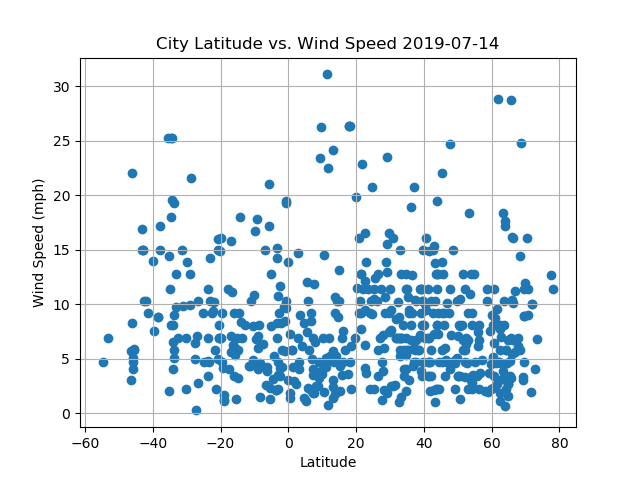

In [10]:
plt.figure()
plt.scatter(city_data_df["Lat"], city_data_df["Wind_speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {Date_of_Analysis}")
plt.grid()

plt.savefig("output_data/Lat_vs_WindSpeed.png")

##### Latitude vs Wind Speed Analysis: 
There is no strong relationship between latitude and wind speed.

##### Note: all output files are saved under the folder output_data.

## Export the DataFrame (city_data_df) in HTML format to the output_data folder

In [19]:
# Reorder the columns in the city_data_df
city_data_df = city_data_df[['City', 'Country','Lat', 'Lng', 'Max_temp', 'Humidity', 'Cloudiness', 'Wind_speed']]
city_data_df

,City,Country,Lat,Lng,Max_temp,Humidity,Cloudiness,Wind_speed
1,atambua,ID,-9.11,124.89,75.39,75.0,1.0,17.85
2,avarua,CK,-21.21,-159.78,68.00,77.0,0.0,2.24
3,punta arenas,CL,-53.16,-70.91,39.20,100.0,75.0,6.93
4,severo-kurilsk,RU,50.68,156.12,43.71,93.0,59.0,10.45
5,port alfred,ZA,-33.59,26.89,62.01,90.0,8.0,5.01
6,dosso,NE,13.05,3.19,97.53,29.0,15.0,2.35
7,mount gambier,AU,-37.83,140.78,50.00,87.0,75.0,17.22
8,qaanaaq,GL,77.48,-69.36,46.23,60.0,51.0,12.71
9,albany,US,42.65,-73.75,87.01,45.0,20.0,14.99
10,tuatapere,NZ,-46.13,167.69,46.95,67.0,91.0,22.01


In [20]:
# export DF to HTML
HTML(city_data_df.to_html(classes='table table-striped table-bordered table-hover'))
city_data_df.to_html('output_data/city_data.html')

In [21]:
print(city_data_df.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>City</th>
      <th>Country</th>
      <th>Lat</th>
      <th>Lng</th>
      <th>Max_temp</th>
      <th>Humidity</th>
      <th>Cloudiness</th>
      <th>Wind_speed</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>atambua</td>
      <td>ID</td>
      <td>-9.11</td>
      <td>124.89</td>
      <td>75.39</td>
      <td>75.0</td>
      <td>1.0</td>
      <td>17.85</td>
    </tr>
    <tr>
      <th>2</th>
      <td>avarua</td>
      <td>CK</td>
      <td>-21.21</td>
      <td>-159.78</td>
      <td>68.00</td>
      <td>77.0</td>
      <td>0.0</td>
      <td>2.24</td>
    </tr>
    <tr>
      <th>3</th>
      <td>punta arenas</td>
      <td>CL</td>
      <td>-53.16</td>
      <td>-70.91</td>
      <td>39.20</td>
      <td>100.0</td>
      <td>75.0</td>
      <td>6.93</td>
    </tr>
    <tr>
      <th>4</th>
      <td>severo-kurilsk</td>
      <td>RU</td>
     